Файл с попыткой обучения нейронной сети (Случайный Лес) для разделения пульсаров по 7 группам

In [29]:
import os
import glob
import shutil

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats.stats import pearsonr

from sklearn import tree
from sklearn import neighbors
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [30]:
gp_table = pd.read_table('./crab_gp_kaz_10_2016-2018_calib_7types.csv', sep='\t')

In [31]:
gp_table.head()

,Date,Time start,"Tay, ms","Period, s","Numpointwin, point","Numpulse, a.u.","Median, adc u","STD, adc u",path obs plot,path obs data,"Count of GP, u","point of gp, point","amp of gp, adc u","W50, point","W10, point",path plot,fName,Type
0,09.09.2010,06:48:41.8374290,2.4576,5.988578,2430,34,1719.858245,8.060292,./obs_plot/09.09.2010_plot_0531+21.png,./obs_data/09.09.2010_obs_0531+21.csv,1,45640,121.161705,19.32975,54.61335,./gp_plot/09.09.2010_plot_0531+21_0.png,./gp_plot_txt/09.09.2010_plot_0531+21_1.csv,6
1,12.09.2010,06:36:54.1340866,2.4576,5.988594,2430,34,1719.899890,7.515294,./obs_plot/12.09.2010_plot_0531+21.png,./obs_data/12.09.2010_obs_0531+21.csv,1,36629,111.648630,19.41885,63.82035,./gp_plot/12.09.2010_plot_0531+21_0.png,./gp_plot_txt/12.09.2010_plot_0531+21_1.csv,6
2,17.09.2010,06:17:14.6399831,2.4576,5.988624,2430,34,1719.914380,7.683190,./obs_plot/17.09.2010_plot_0531+21.png,./obs_data/17.09.2010_obs_0531+21.csv,1,41855,105.871420,18.77040,39.25350,./gp_plot/17.09.2010_plot_0531+21_0.png,./gp_plot_txt/17.09.2010_plot_0531+21_1.csv,6
3,17.10.2010,04:19:17.6313152,2.4576,5.988894,2430,34,1719.841330,11.058682,./obs_plot/17.10.2010_plot_0531+21.png,./obs_data/17.10.2010_obs_0531+21.csv,1,27361,232.496190,21.39390,59.65245,./gp_plot/17.10.2010_plot_0531+21_0.png,./gp_plot_txt/17.10.2010_plot_0531+21_1.csv,6
4,17.10.2010,04:19:17.6313152,2.4576,5.988894,2430,34,1719.841330,11.058682,./obs_plot/17.10.2010_plot_0531+21.png,./obs_data/17.10.2010_obs_0531+21.csv,1,3239,139.469070,12.60765,41.72355,./gp_plot/17.10.2010_plot_0531+21_1.png,./gp_plot_txt/17.10.2010_plot_0531+21_2.csv,6


In [32]:
pat_0 = 0
pat_1 = 0
pat_2 = 0
pat_3 = 0
pat_4 = 0
pat_5 = 0
pat_6 = 0

for idx, _ in enumerate(gp_table['Date']):
    file = './results_by_08.05.2019/' + gp_table['fName'][idx][2:]
    profile = np.genfromtxt(file, skip_header=6)
    
    if len(profile) == 100:
        pass
    else:
        profile = np.append(profile, np.zeros(100 - len(profile)))
        
    profile = profile/np.max(profile)
    
    if gp_table['Type'][idx] == 0:
        pat_0 += profile
    elif gp_table['Type'][idx] == 1:
        pat_1 += profile
    elif gp_table['Type'][idx] == 2:
        pat_2 += profile
    elif gp_table['Type'][idx] == 3:
        pat_3 += profile
    elif gp_table['Type'][idx] == 4:
        pat_4 += profile
    elif gp_table['Type'][idx] == 5:
        pat_5 += profile
    elif gp_table['Type'][idx] == 6:
        pat_6 += profile
    else:
        print('Undetected')

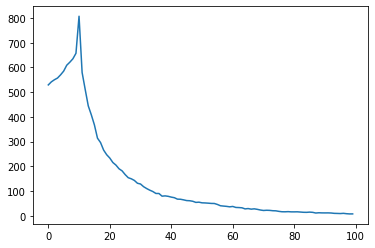

In [33]:
plt.close()
plt.plot(pat_0)
plt.show()

In [34]:
dataset_pulse = pd.DataFrame(columns=[
    'P0', 
    'P1', 
    'P2',
    'P3',
    'P6',
    'type',
])

In [35]:
for idx, _ in enumerate(gp_table['Date']):
    file = './results_by_08.05.2019/' + gp_table['fName'][idx][2:]
    profile = np.genfromtxt(file, skip_header=6)
    
    if len(profile) == 100:
        pass
    else:
        profile = np.append(profile, np.zeros(100 - len(profile)))
        
    profile = profile/np.max(profile)
    
    P0 = pearsonr(profile, pat_0/max(pat_0))
    P1 = pearsonr(profile, pat_1/max(pat_1))
    P2 = pearsonr(profile, pat_2/max(pat_2))
    P3 = pearsonr(profile, pat_3/max(pat_3))
    P4 = pearsonr(profile, pat_4/max(pat_4))
    P5 = pearsonr(profile, pat_5/max(pat_5))
    P6 = pearsonr(profile, pat_6/max(pat_6))
    
    dataset_pulse.loc[idx] = [
            P0[0],
            P1[0],
            P2[0],
            P3[0],
            P6[0],
            int(gp_table['Type'][idx])
        ]

In [36]:
dataset_pulse

,P0,P1,P2,P3,P6,type
0,0.524158,0.734767,0.673418,0.697394,0.940501,6.0
1,0.561387,0.744684,0.675150,0.732212,0.911621,6.0
2,0.544592,0.746682,0.698464,0.693484,0.936563,6.0
3,0.488771,0.731223,0.681545,0.670720,0.948989,6.0
4,0.555878,0.768187,0.716056,0.703432,0.946054,6.0
...,...,...,...,...,...,...
2618,0.589167,0.754351,0.718252,0.650542,0.795528,4.0
2619,0.455342,0.670438,0.610383,0.443497,0.612933,4.0
2620,0.623350,0.718356,0.723797,0.612842,0.779673,4.0
2621,0.513874,0.711130,0.676508,0.588348,0.826464,4.0


In [37]:
corr = dataset_pulse.corr()
corr.style.background_gradient(cmap='coolwarm')

,P0,P1,P2,P3,P6,type
P0,1,0.484096,0.661206,0.756519,0.0231578,-0.301235
P1,0.484096,1,0.899052,0.725068,0.857138,0.532232
P2,0.661206,0.899052,1,0.60733,0.643575,0.344999
P3,0.756519,0.725068,0.60733,1,0.465693,0.0751182
P6,0.0231578,0.857138,0.643575,0.465693,1,0.7748
type,-0.301235,0.532232,0.344999,0.0751182,0.7748,1


In [38]:
X = dataset_pulse.drop(['type'], axis=1)
y = dataset_pulse['type']

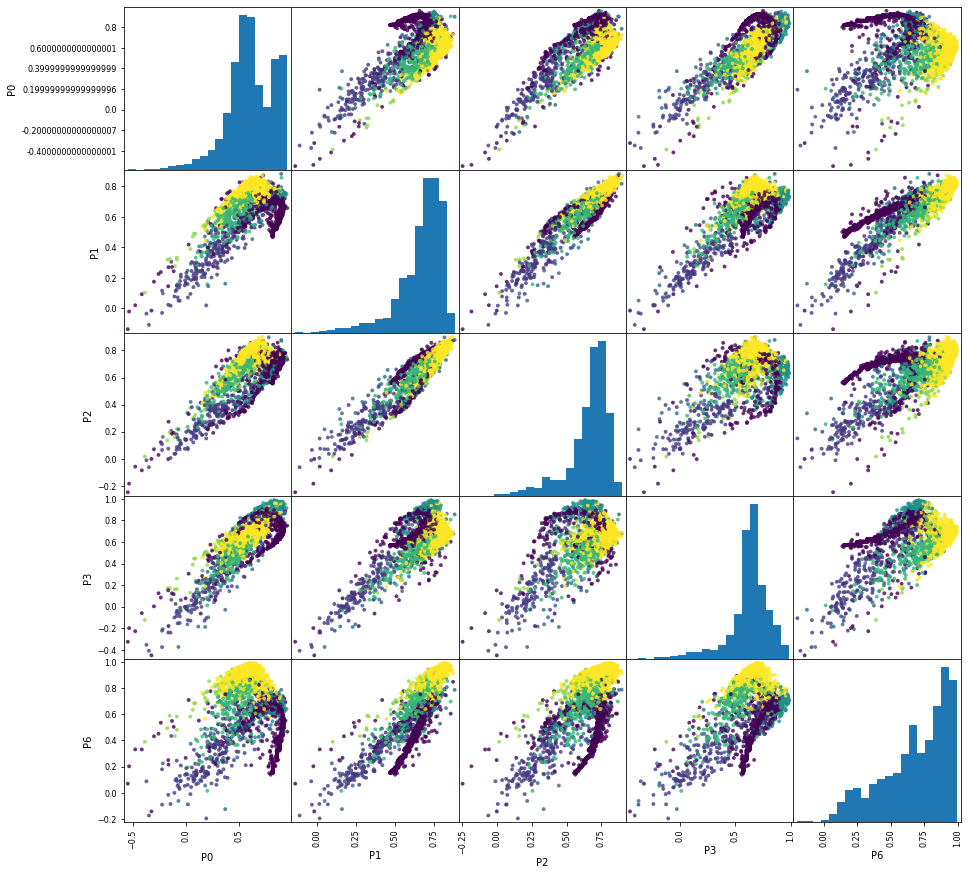

In [39]:
grr = pd.plotting.scatter_matrix(X, c=y, figsize=(15, 15), marker='.',
                                 hist_kwds={'bins': 20}, s=60, alpha=.8)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [41]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(accuracy_score(predictions, y_test))

0.7445997458703939


In [42]:
clf = neighbors.KNeighborsClassifier()
clf = clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(accuracy_score(predictions, y_test))

0.7649301143583227


In [43]:
clf = RandomForestClassifier()
clf = clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(accuracy_score(predictions, y_test))

0.772554002541296


c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [44]:
clf = LogisticRegression()
clf = clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(accuracy_score(predictions, y_test))

0.7013977128335451


c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [45]:
clf = GaussianNB()
clf = clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(accuracy_score(predictions, y_test))

0.7026683608640406


In [46]:
# reset type to 2 fraction 0 - noise and 1 - pulse
for idx, _ in enumerate(dataset_pulse['P0']):
    if dataset_pulse['type'][idx] < 4:
        dataset_pulse['type'][idx] = 0
    else:
        dataset_pulse['type'][idx] = 1

In [47]:
X = dataset_pulse.drop(['type'], axis=1)
y = dataset_pulse['type']

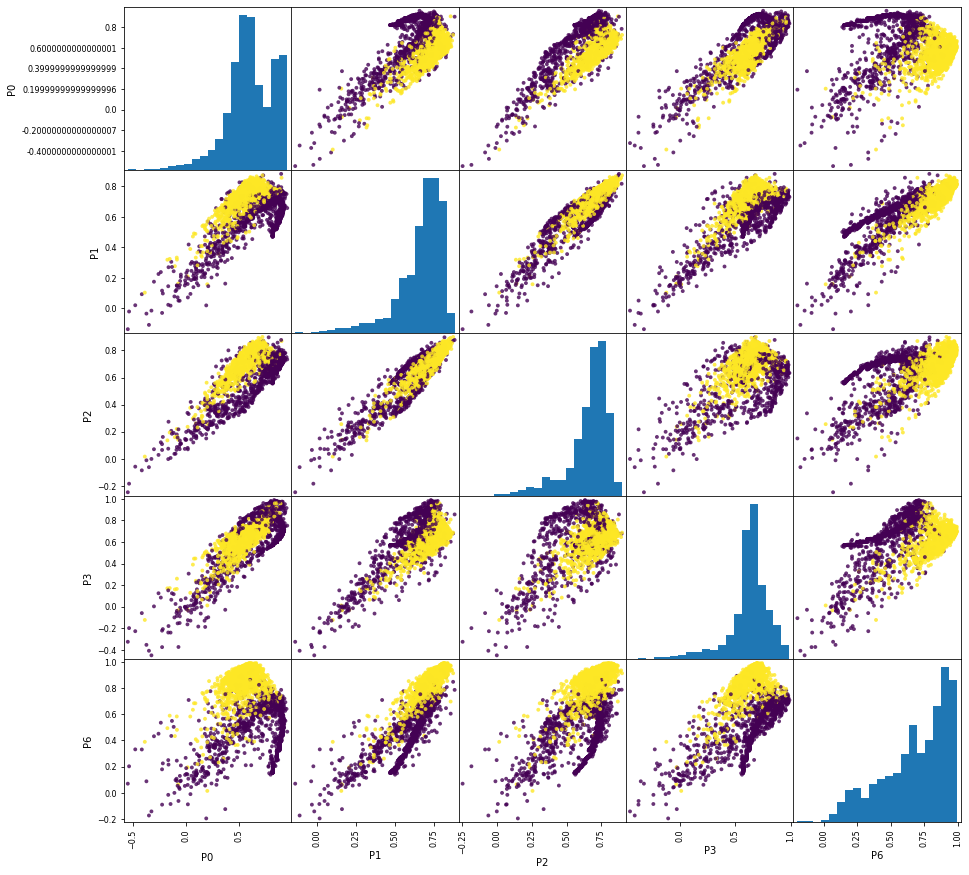

In [48]:
grr = pd.plotting.scatter_matrix(X, c=y, figsize=(15, 15), marker='.',
                                 hist_kwds={'bins': 20}, s=60, alpha=.8)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [50]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(accuracy_score(predictions, y_test))
clf = neighbors.KNeighborsClassifier()
clf = clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(accuracy_score(predictions, y_test))
clf = RandomForestClassifier()
clf = clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(accuracy_score(predictions, y_test))
clf = LogisticRegression()
clf = clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(accuracy_score(predictions, y_test))
clf = GaussianNB()
clf = clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(accuracy_score(predictions, y_test))

0.9047013977128335
0.9364675984752223
0.9440914866581956
0.9339263024142312
0.9008894536213469


c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
